# Linear Models

Go-to as first algorithm to try, good for very large datasets, good for very high-dimensional data.

## Linear Models for Regression

For regression the general prediction formula is:

    y-hat = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b
    
where x[0] to x[p] denotes the features (the number of features is p) of a single data point, w and b are parameters that are learned, and y-hat is the prediction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

/Users/michaello/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


w[0]: 0.393906  b: -0.031804


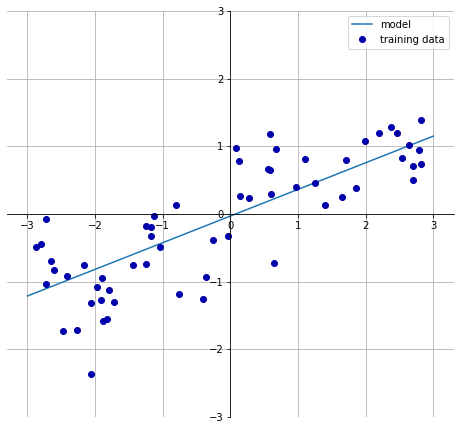

In [2]:
mglearn.plots.plot_linear_regression_wave()

The prediction of a linear regression model is a line when using one feature, a plane when using two features, or a hyperplane in higher dimensions.

If there are more features than training data points, any target y (on the training set) can be perfectly modeled as a linear function. This is apparent with knowledge of linear algebra.

### Linear Regression (aka Ordinary Least Squares)

Linear regression finds the parameters w and b that minimized the mean squared error between the predictions and the true regression targets. Mean squared error is the sum of the squared differences between the predictions and true values. No parameters and no way to control model complexity.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
# separating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# instantiating and fitting the model to training data; no parameters
lr = LinearRegression().fit(X_train, y_train)

In [4]:
# the slopes/weights/coefficients are stored in the coef_ attribute of the model
print("lr.coef_: {}".format(lr.coef_))
# the offset/intercept is stored in the intercept_ attribute of the model
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


scikit-learn stores anything derived from the training data in attributes ending with _ to distinguish them from user-set parameters.

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### Linear Regression With A More Complex Dataset

In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


The much higher training score compared to the test score is a clear sign of overfitting. We should use a model that allows us to control complexity like ridge regression.

### Ridge Regression

Ridge regression is also a linear model for regression so it uses Ordinary Least Squares. However, the coefficients (w) are chosen to not only predict well on the training data, but they also will be as small in magnitude as possible. Each feature will have the smallest slope/influence/weight possible while predicting well.

This particular restraint is known as L2 regularization. Regularization means explicitly restricting a model to avoid overfitting.

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Less complex models perform worse on the training set but generalize better.

The ridge model makes a trade-off between simplicity of the model and performance on the training set. We can specify how much emphasis the model should place on simplicity versus training set accuracy through the alpha parameter. Increasing alpha forces coefficients to move toward zero, decreasing training set performance and POSSIBLY helping generalization.

In [11]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


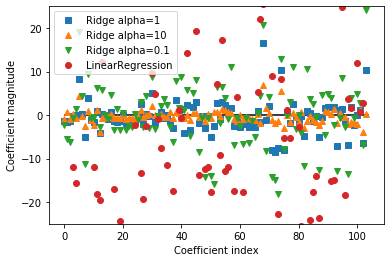

In [13]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

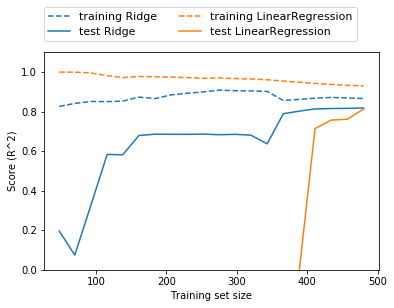

In [14]:
mglearn.plots.plot_ridge_n_samples()

Given enough data, regularization becomes less important; ridge and linear regression will have the same performance with enough data. It also becomes harder to overfit or memorize the data.

### Lasso

Lasso, like ridge regression, also restricts coefficients to be close to zero, but in a slightly different way. Lasso uses L1 regularization which means some coefficients are exactly zero, effectively ignoring some features. This can be considered a form of automatic feature selection, revealing the most important features.

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso also has a parameter alpha that controls how strongly the coefficients are pushed toward zero. However, when adjusting alpha we must also change the maximum number of iterations to run.

In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

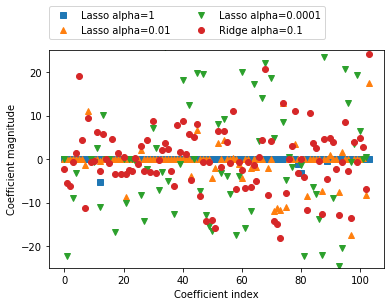

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

The ElasticNet class in scikit-learn combines the penalties of Lasso and Ridge and, in practice, works best. However, there are two parameters to adjust, L1 and L2 regularization.

## Linear Models for Classification

Linear models for classification use a similar formula, however, we threshold the predicted value at 0.

    y-hat = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b > 0
    
If the function is smaller than 0, we predict the class -1; if it is larger than 0, we predict the class +1.

For linear models for regression, the <b>output y-hat</b> is a linear function of the features. For linear models for classification, the <b>decision boundary</b> is a linear function of the input.

The algorithms for learning linear models differ in two ways:
<ol>
<li> (Loss functions) The way they measure the fit of the coefficients and intercept to the training data. This is, many times, of little significance.</li>
<li> If they use regularization and what kind.</li>
</ol>

### Logistic Regression and Linear SVM

/Users/michaello/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


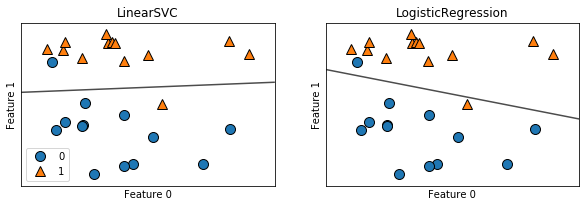

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Logistic Regression and Linear SVC have a parameter named C that determines the strength of regularization. Higher values of C mean fitting the training set better, and lower values of C mean more emphasis on finding a coefficient vector (w) close to zero.

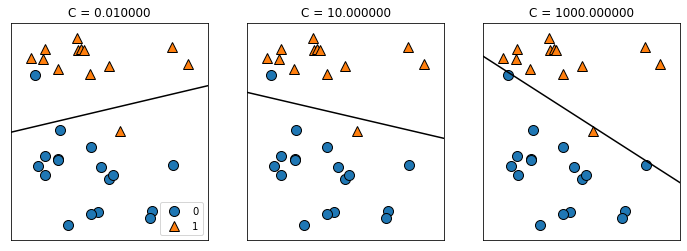

In [23]:
mglearn.plots.plot_linear_svc_regularization()

Again, since Logistic Regression and Linear SVC are linear models, they become very powerful with more features. However, this increases the importance of avoiding overfitting.

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [31]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [35]:
logreg001 = LogisticRegression(C=0.01, max_iter=2000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


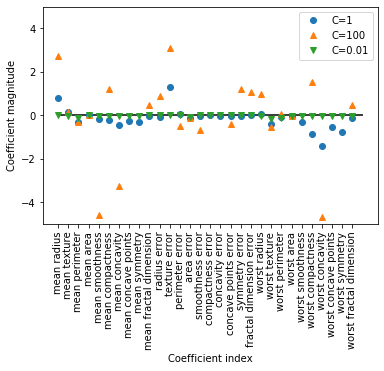

In [36]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


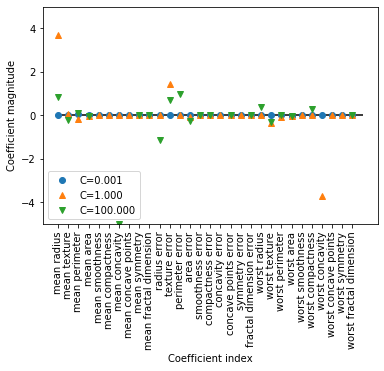

In [39]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", max_iter=5000, solver="liblinear").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear Models for Multiclass Classification

Many linear classification models (with the exception of logistic regression) don't extend naturally from binary classification to the multiclass case. In the one-vs.-rest approach, a binary model is learned for each class. To make a prediction, we run all binary classifiers on a test point and return the class label with the highest score.

One binary classifier per class means having one vector of coefficients (w) and one intercept (b) for each class.

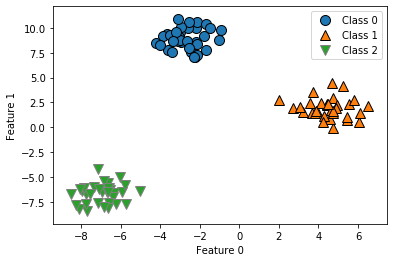

In [40]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [43]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


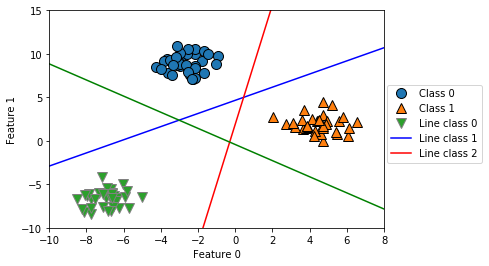

In [45]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Line class 0', 'Line class 1', 
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

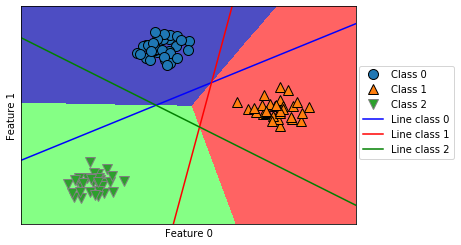

In [47]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
           'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The main parameter for linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large alpha or small C = simple models.

If only a few features are important, use L1 regularization. Otherwise, default to L2. L1 helps with interpretability because it is easier to explain which features are important to the model.

For large datasets (hundreds of thousands to millions), try using solver='sag' in LogisticRegression and Ridge. SGDClassifier and SGDRegressor are more scalable linear model versions.

Linear models usually perform well with high number of features compared to number of samples.